In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [7]:
sales = pd.read_csv("kc_house_data_train.csv", index_col = 0)
holdout = pd.read_csv("kc_house_data_test_features.csv", index_col = 0)
filledrooms = pd.read_csv("bedroomsfilled.csv", index_col = 0)

In [8]:
print(sales.shape)
print(holdout.shape)
print(filledrooms.shape)

sales.head()

(17290, 21)
(4323, 20)
(12, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [10]:
sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [11]:
sales.loc[sales.bedrooms == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
483,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
1120,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
2430,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
3032,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
3609,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
5424,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
6409,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
9286,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
10067,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
10074,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685


In [5]:
def filled_data(df,df2):
    index=df.loc[df.bedrooms == 0].index.to_list()
    df.drop(df.index[[index]], inplace=True)
    frames= [df, df2]
    train = pd.concat(frames)
    return train

In [15]:
sales_df = filled_data(sales, filledrooms)

In [16]:
sales_df.shape

(17290, 21)

In [18]:
sales_df.loc[sales_df.bedrooms == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [19]:
sales_df.loc[sales_df.id == 3374500520]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
483,3374500520,20150429T000000,355000.0,4,2.5,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050


In [20]:
corr=sales_df.corr()

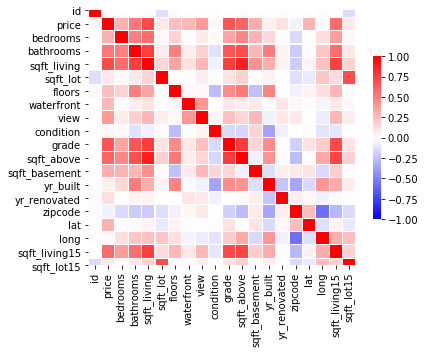

In [22]:
f, ax = plt.subplots(figsize=(6, 6))

# Draw the heatmap
sns.heatmap(corr, cmap="bwr", vmax=1,vmin=-1, center=0, square = True,
             linewidths=.1, cbar_kws={"shrink": .5});

In [23]:
def multicolinear_features(data):
    df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    df['pairs'] = list(zip(df.level_0, df.level_1))
    df.set_index(['pairs'], inplace = True)
    df.drop(columns=['level_1', 'level_0'], inplace = True)
    df.columns = ['cc']
    df.drop_duplicates(inplace=True)
    return df[(df.cc>.75) & (df.cc<1) ]

In [24]:
multicolinear_features(sales_df)

,cc
pairs,
"(sqft_above, sqft_living)",0.876696
"(grade, sqft_living)",0.762929
"(sqft_above, grade)",0.758247
"(sqft_living, bathrooms)",0.756908
"(sqft_living, sqft_living15)",0.755066


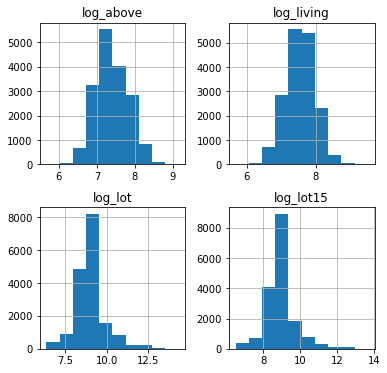

In [29]:
data_log = pd.DataFrame([])
data_log['log_above'] = np.log(sales_df['sqft_above'])
data_log['log_living'] = np.log(sales_df['sqft_living'])
data_log['log_lot'] = np.log(sales_df['sqft_lot'])
data_log['log_lot15'] = np.log(sales_df['sqft_lot15'])
data_log.hist(figsize  = [6, 6]);

In [30]:
log_above = data_log['log_above']
log_living = data_log['log_living']
log_lot = data_log['log_lot']
log_lot15 = data_log['log_lot15']



scaled_above= (log_above - np.mean(log_above)) / np.sqrt(np.var(log_above))
scaled_living = (log_living - np.mean(log_living)) / np.sqrt(np.var(log_living))
scaled_lot = (log_lot - np.mean(log_lot)) / np.sqrt(np.var(log_lot))
scaled_lot15 = (log_lot15 - np.mean(log_lot15)) / (max(log_lot15) - min(log_lot15))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled['std_above'] = scaled_above
data_cont_scaled['std_living'] = scaled_living
data_cont_scaled['std_lot'] = scaled_lot
data_cont_scaled['mean_norm_lot15'] = scaled_lot15

waterfront_dummies = pd.get_dummies(sales_df["waterfront"], prefix="wfront")
view_dummies = pd.get_dummies(sales_df["view"], prefix="view")
grade_dummies = pd.get_dummies(sales_df["grade"], prefix="grade")
zipcode_dummies = pd.get_dummies(sales_df["zipcode"], prefix="zipcode")
bedroom_dummies = pd.get_dummies(sales_df["bedrooms"], prefix="rooms")
bathroom_dummies = pd.get_dummies(sales_df["bathrooms"], prefix="bathrooms")

price = sales_df["price"]

data_fin = pd.concat([price, data_cont_scaled, waterfront_dummies, view_dummies, grade_dummies,zipcode_dummies, bedroom_dummies, bathroom_dummies], axis=1)



In [31]:
multicolinear_features(sales_df)

,cc
pairs,
"(sqft_above, sqft_living)",0.876696
"(grade, sqft_living)",0.762929
"(sqft_above, grade)",0.758247
"(sqft_living, bathrooms)",0.756908
"(sqft_living, sqft_living15)",0.755066


In [35]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_hat =lr.predict(X_test)
RMSE = mean_squared_error(y_test, y_hat)

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,               # Pass in our X and y
                                                    random_state=42,    # Abritary select a random_state 
                                                    test_size=0.2)        # Split test size to be 20% of full data.
                              

ModuleNotFoundError: No module named 'sklearn.cross_validation'